In [27]:
import pandas as pd
import wfdb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import sklearn
import h5py

#constant values
RANDOM_STATE = 42

In [17]:
 # Load labels
sami_trop_df = pd.read_csv('../data/Sami-Trop.csv')
sami_trop_df.sort_values(by='exam_id', ascending=True, inplace=True)
sami_trop_df.head()

,exam_id,age,is_male,normal_ecg,death,timey,nn_predicted_age
286,3629,54,True,False,False,1.933700,74.098280
1012,4991,85,False,False,False,2.240329,82.126080
1020,8760,29,True,False,False,2.160219,67.648590
1074,18511,75,False,False,False,2.433699,46.081425
514,20122,85,False,False,False,2.011048,64.305140


In [18]:

sami_trop_df['is_male'] = sami_trop_df['is_male'].astype(int)
sami_trop_df['normal_ecg'] = sami_trop_df['normal_ecg'].astype(int)
sami_trop_df['death'] = sami_trop_df['death'].astype(int)
sami_trop_df.dtypes

exam_id               int64
age                   int64
is_male               int64
normal_ecg            int64
death                 int64
timey               float64
nn_predicted_age    float64
dtype: object

In [19]:
with h5py.File("../data/Sami-Trop.hdf5") as f: 
    tracings = f['tracings'][:]
tracings.shape

(1631, 4096, 12)

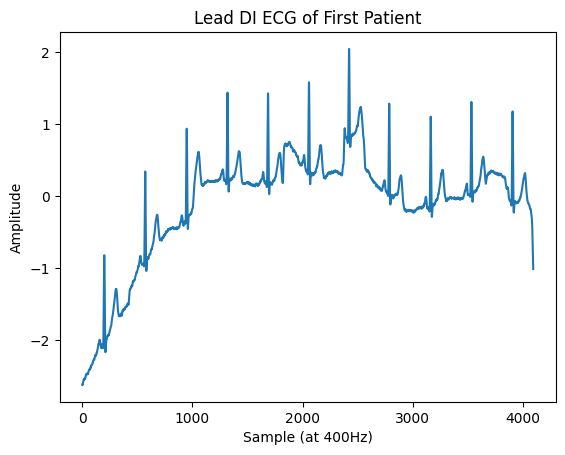

In [20]:
example_ecg = tracings[0]

# Plot one lead
import matplotlib.pyplot as plt

plt.plot(example_ecg[:, 0])  # Lead DI
plt.title("Lead DI ECG of First Patient")
plt.xlabel("Sample (at 400Hz)")
plt.ylabel("Amplitude")
plt.show()

In [22]:
X = sami_trop_df[['age', 'is_male', "normal_ecg"]]
Y = sami_trop_df['death']

### Split data 

In [28]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, Y, test_size=0.2, random_state=RANDOM_STATE)

print("X train length:", len(X_train))
print("Y train length:", len(y_train))
print("X test length:", len(X_test))
print("Y test length:", len(y_test))

X train length: 1304
Y train length: 1304
X test length: 327
Y test length: 327


In [30]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=4, random_state=RANDOM_STATE)
tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
y_pred = tree.predict(X_test)
print("Accuracy:", sklearn.metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9541284403669725
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       311
           1       1.00      0.06      0.12        16

    accuracy                           0.95       327
   macro avg       0.98      0.53      0.55       327
weighted avg       0.96      0.95      0.93       327



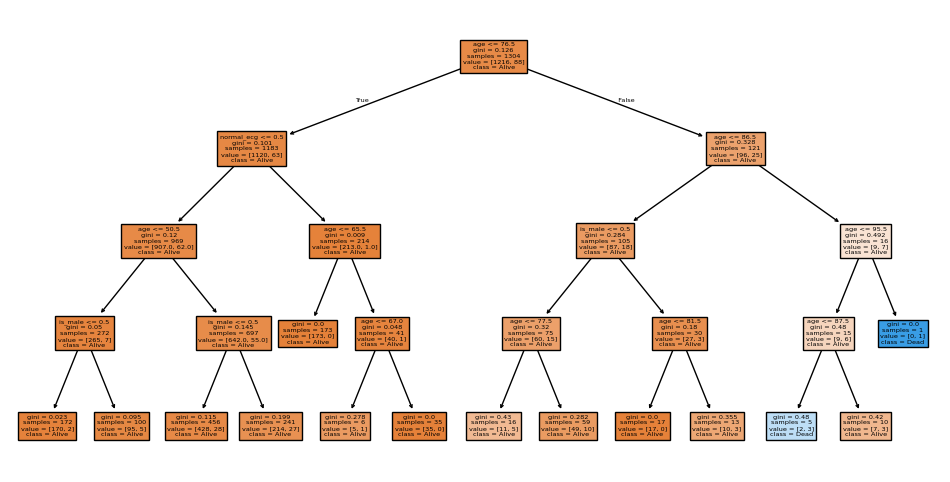

In [33]:
plt.figure(figsize=(12, 6))
sklearn.tree.plot_tree(tree, feature_names=X.columns, class_names=["Alive", "Dead"], filled=True)
plt.show()